AUTOR: ÁLLIFE LICIO LACERDA<br>
Estudando Algoritmo KMeans

**Descrição do problema:**<br>
A partir de dados de consumo de energia elétrica de clientes, agrupar os consumidores por similaridade para compreender o comportamento dos clientes e sua relação com o consumo de energia elétrica.

**Fonte dos dados:**<br>
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

**Dicionário de dados:**<br>
1. **date:** Date in format dd/mm/yyyy<br>
2. **time:** time in format hh:mm:ss<br>
3. **global_active_power:** household global minute-averaged active power (in kilowatt)<br>
4. **global_reactive_power:** household global minute-averaged reactive power (in kilowatt)<br>
5. **voltage:** minute-averaged voltage (in volt)<br>
6. **global_intensity:** household global minute-averaged current intensity (in ampere)<br>
7. **sub_metering_1:** energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).<br>
8. **sub_metering_2:** energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.<br>
9. **sub_metering_3:** energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist, pdist
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
dataset = pd.read_csv('household_power_consumption.txt', delimiter = ';', low_memory = False)

In [4]:
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
dataset.shape

(2075259, 9)

In [6]:
dataset.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
(25979/2075259) * 100

1.2518437457686005

Como nosso dataset é muito grande (2MM de linhas), e temos apenas 1.25% de valores nulos, nesse caso, os valores nulos serão removidos.<br>
Também removeremos as colunas Date e Time, elas não são interessantes para nosso caso.

In [8]:
dataset.drop(columns=["Date","Time"], inplace = True)

In [9]:
dataset.dropna(inplace = True)

In [10]:
dataset.shape

(2049280, 7)

In [11]:
dataset.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Pré-processamento concluído.

Preparar os dados para o KMeans

In [12]:
dataset.head(3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0


In [13]:
#Transformar nossos dados em um array.
dataset = dataset.values

In [14]:
dataset

array([['4.216', '0.418', '234.840', ..., '0.000', '1.000', 17.0],
       ['5.360', '0.436', '233.630', ..., '0.000', '1.000', 16.0],
       ['5.374', '0.498', '233.290', ..., '0.000', '2.000', 17.0],
       ...,
       ['0.938', '0.000', '239.820', ..., '0.000', '0.000', 0.0],
       ['0.934', '0.000', '239.700', ..., '0.000', '0.000', 0.0],
       ['0.932', '0.000', '239.550', ..., '0.000', '0.000', 0.0]],
      dtype=object)

In [15]:
type(dataset)

numpy.ndarray

In [16]:
dataset.shape

(2049280, 7)

Como nosso conjunto de dados é muito grande (2MM de linhas * 7 colunas), utilizaremos 1% dos dados para o estudo, por conta de limitações da máquina.

In [17]:
dataset, _ = train_test_split(dataset, train_size = .01)

In [18]:
dataset.shape

(20492, 7)

Como temos 7 variáveis no nosso dataset, utilizaremos **PCA (principal component analysis)** para reduzirmos o número de variáveis para 2 componentes principais.

In [19]:
pca = PCA(n_components = 2).fit_transform(dataset)

Agora podemos partir para o KMeans, de fato.<br>
Mas como definir o número ideal de clusters?<br>
Normalmente, a área de negócio informa um número de agrupamentos desejados e também podemos usar a **Curva de Elbow** para decidirmos o melhor número de clusters possível.

Vamos testar nosso algoritmo para 12 clusters, e depois utilizar Curva de Elbow para escolhermos o melhor cenário.

In [20]:
k = range(1,12)

Aplicar KMeans de 1 a 12 clusters

In [21]:
# k = 1..12
kmeans_var = [KMeans(n_clusters = k).fit(pca) for k in k]

Vamos visualizar a Curva de Elbow para melhor entendimento

Text(0.5, 1.0, 'Variância Explicada para cada Valor de K')

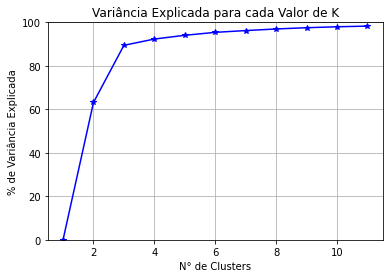

In [22]:
# salvando os centróides dos clusters para cada modelo(k)
centroids = [item.cluster_centers_ for item in kmeans_var]

# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

# Soma total dos quadrados
soma_total = sum(pdist(pca)**2)/pca.shape[0]

# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1,12), soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('N° de Clusters')
plt.ylabel('% de Variância Explicada')
plt.title('Variância Explicada para cada Valor de K')

Criando e escolhendo o melhor modelo KMeans.<br>
**silhouette_score**: métrica de avaliação de clusterização.

In [23]:
eixo_x = pca[:,0]
eixo_y = pca[:,1]

In [24]:
#k = 8
mod1 = KMeans(n_clusters = 8)
mod1.fit(pca)
labels = mod1.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.8089084122243223

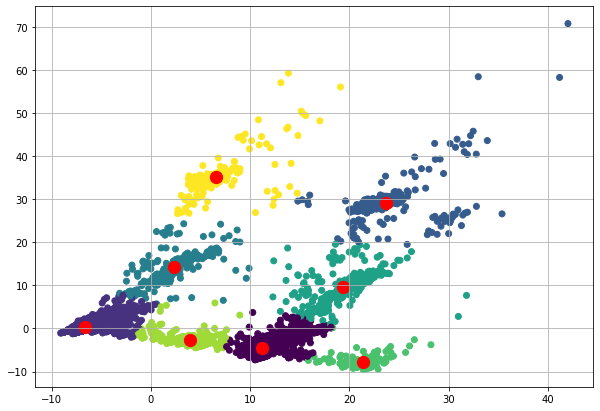

In [25]:
plt.figure(figsize=(10,7))
plt.scatter(eixo_x, eixo_y, c = mod1.labels_)
plt.scatter(mod1.cluster_centers_[:,0],mod1.cluster_centers_[:,1], s = 150, c = 'red')
plt.grid()
plt.show()

In [26]:
#k = 9
mod2 = KMeans(n_clusters = 9)
mod2.fit(pca)
labels = mod2.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.67026108210388

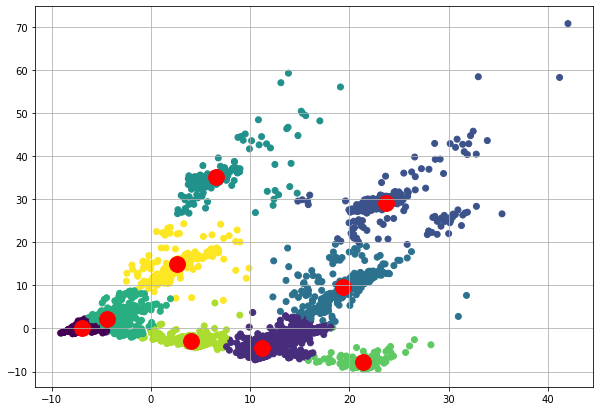

In [27]:
plt.figure(figsize=(10,7))
plt.scatter(eixo_x, eixo_y, c = mod2.labels_)
plt.scatter(mod2.cluster_centers_[:,0],mod2.cluster_centers_[:,1], s = 250, c = 'red')
plt.grid()
plt.show()

In [28]:
#k = 10
mod3 = KMeans(n_clusters = 10)
mod3.fit(pca)
labels = mod3.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.6263112580416521

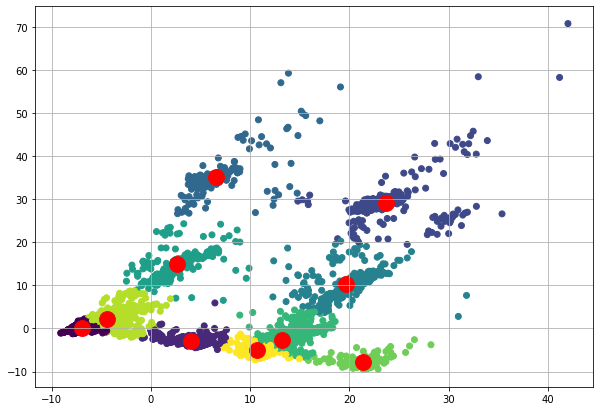

In [29]:
plt.figure(figsize=(10,7))
plt.scatter(eixo_x, eixo_y, c = mod3.labels_)
plt.scatter(mod3.cluster_centers_[:,0],mod3.cluster_centers_[:,1], s = 250, c = 'red')
plt.grid()
plt.show()

In [30]:
#k = 11
mod4 = KMeans(n_clusters = 11)
mod4.fit(pca)
labels = mod4.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.6265317492803459

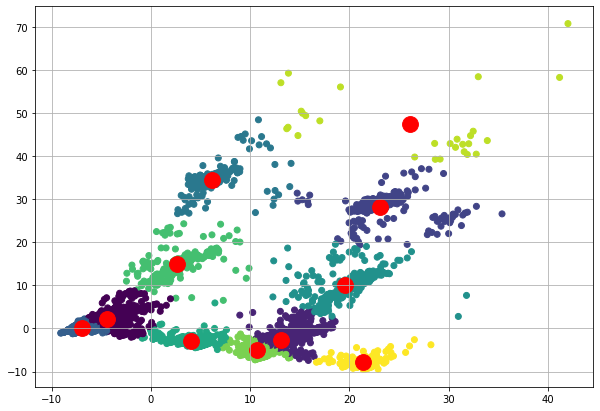

In [31]:
plt.figure(figsize=(10,7))
plt.scatter(eixo_x, eixo_y, c = mod4.labels_)
plt.scatter(mod4.cluster_centers_[:,0],mod4.cluster_centers_[:,1], s = 250, c = 'red')
plt.grid()
plt.show()

Observamos pelo **silhouette_score** que a melhor quantidade de clusters é 8.<br>
Ou seja, agrupamos nossos clientes em 8 tipos (0..7)

Agora vamos inserir nosso tipo de cliente no nosso dataset.

In [32]:
nomes = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

In [33]:
dataset.shape

(20492, 7)

In [34]:
df_clustered = pd.DataFrame(dataset, columns = nomes)
df_clustered['my_cluster'] = mod1.labels_

In [35]:
df_clustered.head(3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,my_cluster
0,7.124,0.450,233.900,30.400,0.000,72.000,16.0,2
1,0.288,0.050,243.550,1.400,0.000,0.000,0.0,1
2,1.270,0.432,242.920,5.600,0.000,0.000,13.0,6


In [36]:
df_clustered['Global_active_power'] = pd.to_numeric(df_clustered['Global_active_power'])

In [37]:
# Calcula a média de consumo de energia por cluster
df_clustered.groupby('my_cluster')['Global_active_power'].mean()

my_cluster
0    1.816003
1    0.506877
2    4.512061
3    2.694738
4    3.837672
5    2.395075
6    1.120241
7    3.424661
Name: Global_active_power, dtype: float64